## Handwritten Digit Recognition using MNIST Dataset using SVM Classifier

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Handwritten Digit Recognition

Use the sklearn.dataset load_digits() method. It loads the handwritten digits dataset.
The returned data is in the form of a Dictionary.
The 'data' attribute contains a flattenned array of 64 (each digit image is of 8*8 pixels) elements representing the digits.

The 'target' attribute is the 'class' of Digit (0-9)
Each individual digit is represented through a flattendded 64 digit array numbers of Greyscale values.
There are 1797 samples in total and each class or digit has roughly 180 samples.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

In [3]:
dir(digits) # These are the attributes of the digits dataset or we can say key of the dictionary

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits["data"][0] # This is the first image in the dataset, it is a 64 pixel image 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
img=digits['data'][2].reshape(8,8) # Reshape the 64 pixel image to 8x8 matrix

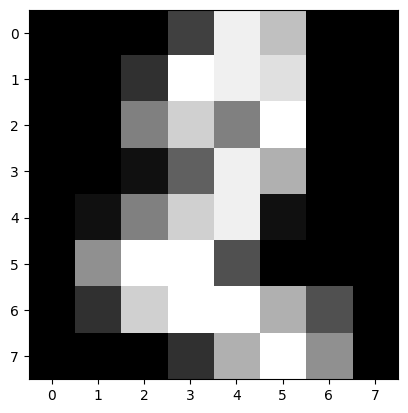

In [15]:
plt.imshow(img,cmap="gray") # we use imgshow to display the image and imgread to read the image

In [8]:
digits['target'][0] # here input is our image and correstponding output is the label of the image

0

In [ ]:
digits['target'][0:9] # this will give us the first 9 labels of the images

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
digits['target'][0] # This is the target value of the first image, it is a 0

0

In [17]:
digits.images[0] # This is the first image in the dataset, it is a 8x8 matrix

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

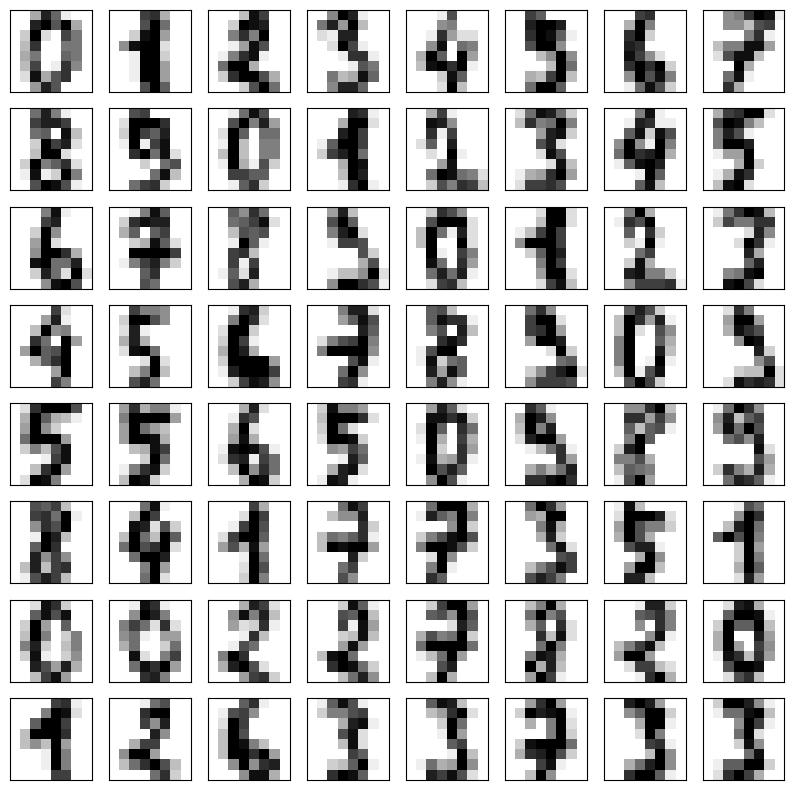

In [18]:
# Each Digit is represented in digits.images as a matrix of 8x8 = 64 pixels. Each of the 64 values represent
# a greyscale. The Greyscale are then plotted in the right scale by the imshow method.

fig, ax = plt.subplots(8,8, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

d:\Nirupam Gangurde\CDAC\New_ML_Models\.venv\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\Nirupam Gangurde\CDAC\New_ML_Models\.venv\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


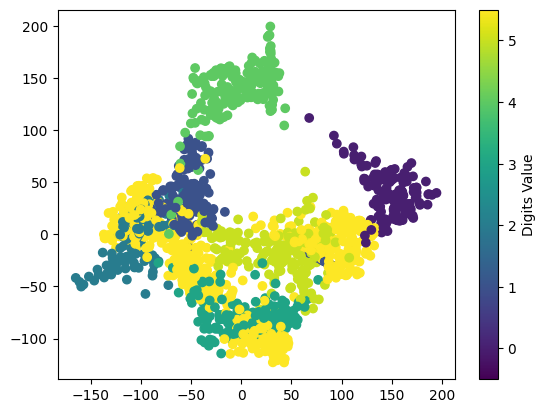

In [19]:
# Plotting - Clustering the data points after using Manifold Learning

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)

projection = iso.fit_transform(digits.data)     # digits.data - 64 dimensions to 2 dimensions

plt.scatter(projection[:, 0], projection[:, 1], c=digits.target, cmap="viridis")

plt.colorbar(ticks=range(10), label='Digits Value')
plt.clim(-0.5, 5.5)

In [20]:
print(projection[:, 0][70], projection[:, 1][70])

-56.8784864151301 62.09402672588057


In [21]:
def view_digit(index):
    plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
    plt.title('Orignal it is: '+ str(digits.target[index]))
    plt.show()

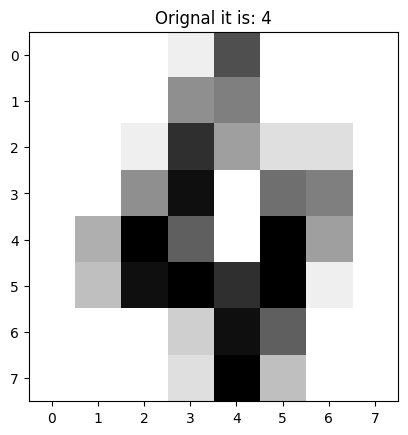

In [22]:
view_digit(4)

### Use the Support Vector Machine Classifier to train the Data
Use part of the data for train and part of the data for test (predicion)

In [23]:
main_data = digits['data']
targets = digits['target']

In [29]:
main_data.shape # we have 1797 images and each image has 64 pixels (arrays)

(1797, 64)

In [ ]:
targets.shape # we have 1797 labels for the images

(1797,)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(main_data,
                                               targets,
                                               test_size=0.3,
                                               stratify=targets,
                                               random_state=101)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1257, 64) (1257,)
(540, 64) (540,)


In [26]:
from sklearn.svm import SVC

svc =SVC(gamma=0.001 , C = 100)

# GAMMA is a parameter for non linear hyperplanes.
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term.
# It controls the trade off between smooth decision boundary and classifying the training points correctly.

svc.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [30]:
from sklearn.metrics import classification_report
print("Report for training data")
train_pred=svc.predict(X_train)
print(classification_report(train_pred,y_train))
print("Report for Test data")
test_pred=svc.predict(X_test)
print(classification_report(test_pred,y_test))

Report for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       124
           3       1.00      1.00      1.00       128
           4       1.00      1.00      1.00       127
           5       1.00      1.00      1.00       127
           6       1.00      1.00      1.00       127
           7       1.00      1.00      1.00       125
           8       1.00      1.00      1.00       122
           9       1.00      1.00      1.00       126

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257

Report for Test data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      1.00      1.00        55
           2       1.00      1.0

### Create the Confusion Matric for Performance Evaluation

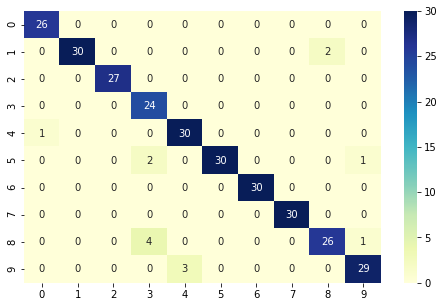

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predictions, targets[1501:])

conf_matrix = pd.DataFrame(data = cm)

plt.figure(figsize = (8,5))

sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
cm

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0, 30,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0, 26,  1],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0, 29]])

### Print the Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296

